# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 20, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import plot_tree, DecisionTreeClassifier

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
X_train = pd.read_csv('/content/drive/MyDrive/CURSOS/EBAC/Cientista de Dados/21 - Árvore de Decisão/Tarefa/X_train_balanced.csv')
y_train = pd.read_csv('/content/drive/MyDrive/CURSOS/EBAC/Cientista de Dados/21 - Árvore de Decisão/Tarefa/y_train_balanced.csv')
X_test = pd.read_csv('/content/drive/MyDrive/CURSOS/EBAC/Cientista de Dados/21 - Árvore de Decisão/Tarefa/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/CURSOS/EBAC/Cientista de Dados/21 - Árvore de Decisão/Tarefa/y_test.csv')

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            252 non-null    int64  
 1   Income                         252 non-null    float64
 2   Number_of_Children             252 non-null    int64  
 3   Gender_encoded                 252 non-null    int64  
 4   Status_encoded                 252 non-null    int64  
 5   Home_encoded                   252 non-null    int64  
 6   Education_BACHELOR'S DEGREE    252 non-null    int64  
 7   Education_DOCTORATE            252 non-null    int64  
 8   Education_HIGH SCHOOL DIPLOMA  252 non-null    int64  
 9   Education_MASTER'S DEGREE      252 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 19.8 KB


**- Base X_train balanceada, com 252 linhas, todas as variáveis, menos Score_peso.**

In [30]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Score_peso  252 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


**- Base y_train balanceada, com 252 linhas, apenas a variável Score_peso.**

In [31]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            41 non-null     int64  
 1   Income                         41 non-null     float64
 2   Number_of_Children             41 non-null     int64  
 3   Gender_encoded                 41 non-null     int64  
 4   Status_encoded                 41 non-null     int64  
 5   Home_encoded                   41 non-null     int64  
 6   Education_BACHELOR'S DEGREE    41 non-null     int64  
 7   Education_DOCTORATE            41 non-null     int64  
 8   Education_HIGH SCHOOL DIPLOMA  41 non-null     int64  
 9   Education_MASTER'S DEGREE      41 non-null     int64  
dtypes: float64(1), int64(9)
memory usage: 3.3 KB


**- Base X_test, com 41 linhas, todas as variáveis, menos Score_peso.**

In [32]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Score_peso  41 non-null     int64
dtypes: int64(1)
memory usage: 460.0 bytes


**- Base y_test, com 41 linhas, apenas a variável Score_peso.**

In [33]:
contagem_valores = y_train.value_counts()
print(contagem_valores)

Score_peso
0             84
1             84
2             84
Name: count, dtype: int64


**- Base de treino balanceada.**

# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

- Realizar a **importação das bibliotecas** que serão usadas no projeto
- **Carregar a base** de dados
- Verificar os **tipos de dados** e fazer as modificações quando necessário
- Verificar **dados faltantes** nas colunas e realizar **exclusão ou substituição** dessas linhas pela média, mediana ou moda dos valores da coluna
- Verificar se existem **erros de digitação** nas variáveis categóricas e fazer a correção se necessário
- Realizar a **análise univariada** das variáveis utilizando **plotagens** e trazendo **insights**
- Verificar e analisar a necessidade de tratar **outliers** das variáveis numéricas
- Elaborar **perguntas** que devem ser respondidas na análise bivariada
- Realizar a **análise bivariada** das variáveis utilizando **plotagens** e trazendo **insights**
- Verificar a **correlação** existente entre as variáveis númericas utilizando a **matriz de correlação** ou o **mapa de calor** e trazendo **insights**
- Realizar o **tratamento dos dados categóricos** um dos métodos de **Encoder**, alterar as novas colunas com tipo de dados booleano para tipo numérico e **excluir as variáveis categóricas**
- Verificar novamente a **correlação** agora para **todas as variáveis**, pois todas são do tipo numérico, trazendo **insights**
- Fazer a **separação da base em treino e teste**, onde X carrega todas as variáveis menos a alvo, e y carrega apenas a variável alvo, ou seja, o que queremos prever.
- Verificar o **balanceamento da variável alvo** através de **plotagem**, trazendo **insights**
- Realizar o **balanceamento das bases de treino**
- **Salvar** as bases de treino e teste
- **Carregar as bases** de treino e teste
- Verificar se **número de linhas e colunas** está correto entre as bases
- Verificar se a **base de treino** está realmente **balanceada**
- Podemos então prosseguir para a etapa de aplicação do **algoritmo da árvore de decisão**, primeiro para a base de treino e em seguida para a base de teste
- **Avaliar desempenho** das bases de treino e teste, trazendo **insights** sobre a acurácia, precisão, recall e f1-score
- **Plotar** relatório de classificação e matriz de confusão para auxiliar na avaliação
- O modelo pode também ser melhorado verificando as variáveis melhor rankeadas na **importância das features**, e executando o algoritmo com apenas essas variáveis
- Pode-se também **ajustar outros parâmetros** da função DecisionTreeClassifier para otimizar o desempenho do modelo, como por exemplo os parâmetros de poda, profundidade máxima da árvore e de limitação de folhas da árvore


# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modelo com os dados de treino.

In [34]:
arvore_score = DecisionTreeClassifier(criterion='gini', random_state=0)
arvore_score.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [35]:
y_train_pred = arvore_score.predict(X_train)
y_train_pred[:10]

array([1, 0, 1, 1, 1, 2, 2, 2, 1, 2])

In [36]:
y_train[:10]

,Score_peso
0,1
1,0
2,1
3,1
4,1
5,2
6,2
7,2
8,1
9,2


In [37]:
acuracia_treino = accuracy_score(y_train, y_train_pred)
print("Acurácia:", acuracia_treino)

Acurácia: 1.0


- Na etapa de treino, o modelo conseguiu prever corretamente 100% dados

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [38]:
previsoes = arvore_score.predict(X_test)
previsoes[:10]

array([1, 2, 1, 2, 2, 1, 2, 2, 2, 2])

In [39]:
y_test[:10]

,Score_peso
0,1
1,2
2,1
3,2
4,2
5,1
6,2
7,2
8,2
9,2


In [40]:
acuracia_teste = accuracy_score(y_test, previsoes)
print("Acurácia:", acuracia_teste)

Acurácia: 0.975609756097561


- Na etapa de teste, o modelo conseguiu prever corretamente 97.56% dos dados

In [41]:
relatorio = classification_report(y_test, previsoes)
print("Relatório de Classificação")
print(relatorio)

Relatório de Classificação
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.86      1.00      0.92         6
           2       1.00      0.97      0.98        29

    accuracy                           0.98        41
   macro avg       0.95      0.99      0.97        41
weighted avg       0.98      0.98      0.98        41



- Para a classe 0: A precisão é de 100%, o que significa que 100% das amostras previstas como pertencentes à classe 0 são realmente da classe 0.
- Para a classe 1: A precisão é de 86%, o que significa que 86% das amostras previstas como pertencentes à classe 1 são realmente da classe 1.
- Para a classe 2: A precisão é de 100%, o que significa que 100% das amostras previstas como pertencentes à classe 2 são realmente da classe 2.

- Para a classe 0: O recall é de 100%, indicando que o modelo identificou corretamente 100% das amostras da classe 0.
- Para a classe 1: O recall é de 100%, indicando que o modelo identificou corretamente 100% das amostras da classe 1.
- Para a classe 2: O recall é de 97%, indicando que o modelo identificou corretamente 97% das amostras da classe 2.

- A acurácia global é de 98%, o que significa que 98% de todas as previsões do modelo estão corretas.

- A média ponderada de 98% para precision, recall e f1-score reflete o desempenho geral do modelo, com maior influência da classe 2, que corresponde a 71% das amostras.

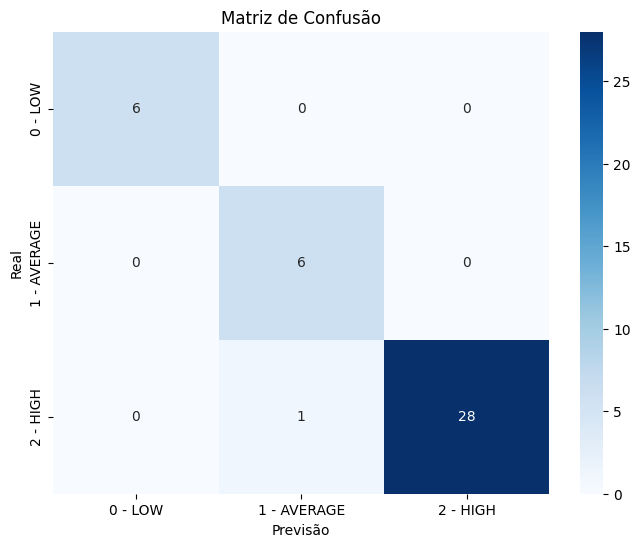

In [42]:
matriz_confusao = confusion_matrix(y_test, previsoes)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, cmap='Blues', fmt='d',
            xticklabels=['0 - LOW', '1 - AVERAGE', '2 - HIGH'],
            yticklabels=['0 - LOW', '1 - AVERAGE', '2 - HIGH'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

- **Todas** as ocorrências da categoria **0-LOW** foram previstas corretamente pelo modelo
- **Todas** as ocorrências da categoria **1-AVERAGE** foram previstas corretamente pelo modelo
- Para a categoria **2-HIGH**, o modelo previu corretamente **28 ocorrências**, porém considerou **uma** como sendo da categoria **1-AVERAGE**

- Acurácia Treino: 1.0
- Acurácia Teste: 0.975609756097561

- Apesar do desempenho ligeiramente inferior ao treino, o modelo de teste ainda apresenta um ótimo desempenho ao analisar novos dados. Não está ocorrendo overfitting, já que o modelo realmente aprendeu os padrões e conseguiu classificar corretamente os dados novos.

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

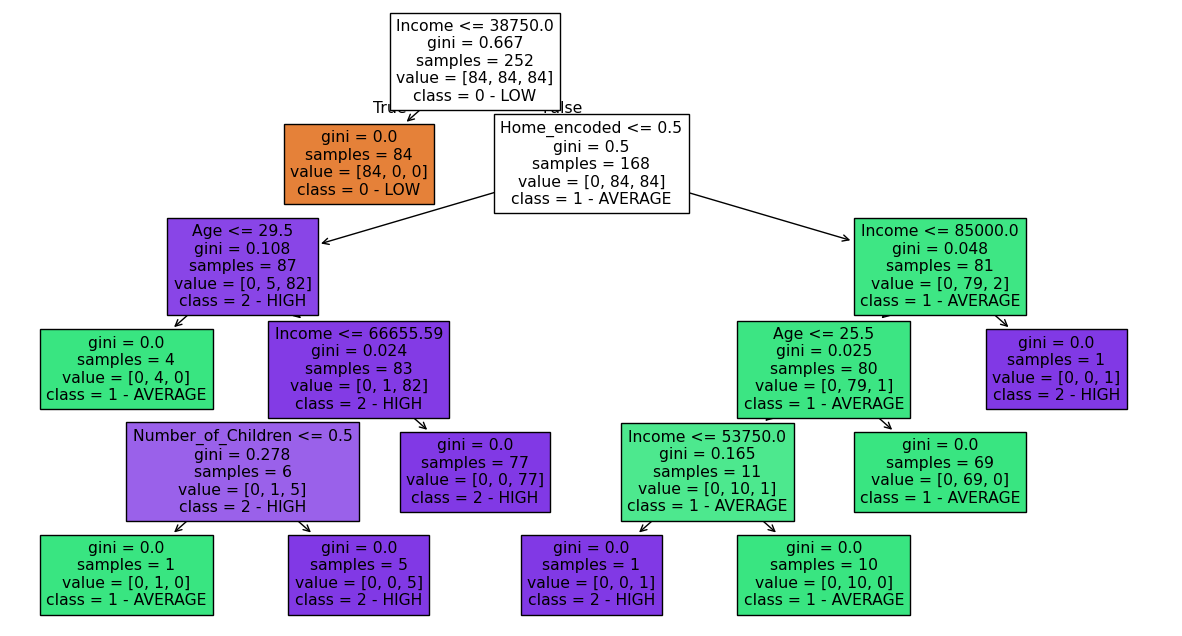

In [43]:
plt.figure(figsize=(15,8))
plot_tree(arvore_score, filled=True, feature_names=X_train.columns, class_names=['0 - LOW', '1 - AVERAGE', '2 - HIGH'])
plt.show()

- É possível verificar que o modelo considera **Income** o fator mais importante, a partir do qual inicia a divisão e logo identifica as ocorrências da classe 0-LOW. Seguido de **Home_encoded**, o modelo divide o restante dos dados para classificar os dados em 1-AVERAGE e 2-HIGH, orbitando as variáveis **Income**, **Age** e **Number_of_Children** (que também são features importantes para a análise).

In [44]:
profundidade = arvore_score.get_depth()
print("Profundidade:", profundidade)

Profundidade: 5


# 6) Identifique as 2 principais features do modelo.


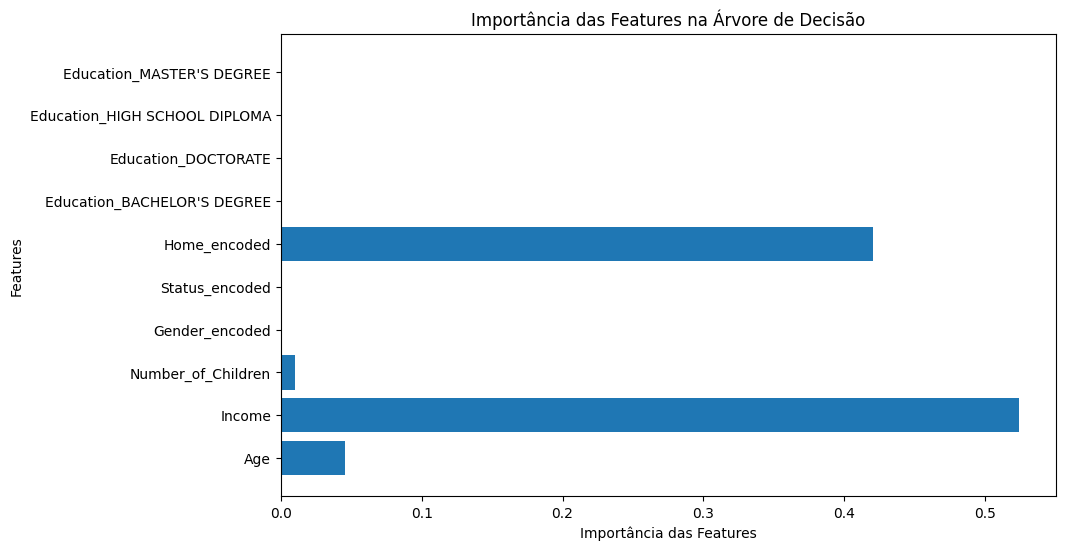

In [45]:
importancias_features = arvore_score.feature_importances_

nomes_features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(nomes_features, importancias_features)
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features na Árvore de Decisão')
plt.show()

- As 2 principais features do modelo são **Income** e **Home_encoded**

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [46]:
X_train_reduzido = X_train[['Home_encoded', 'Income']]
X_test_reduzido = X_test[['Home_encoded', 'Income']]

In [47]:
arvore_score_reduzido = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
arvore_score_reduzido.fit(X_train_reduzido, y_train)

DecisionTreeClassifier(random_state=0)

In [48]:
previsoes_reduzido = arvore_score_reduzido.predict(X_test_reduzido)

In [49]:
relatorio = classification_report(y_test, previsoes_reduzido)
print("Relatório de Classificação")
print(relatorio)

Relatório de Classificação
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.83      0.83      0.83         6
           2       0.97      0.97      0.97        29

    accuracy                           0.95        41
   macro avg       0.93      0.93      0.93        41
weighted avg       0.95      0.95      0.95        41



- Para a classe 0: A precisão é de 100%, o que significa que 100% das amostras previstas como pertencentes à classe 0 são realmente da classe 0.
- Para a classe 1: A precisão é de 83%, o que significa que 83% das amostras previstas como pertencentes à classe 1 são realmente da classe 1.
- Para a classe 2: A precisão é de 97%, o que significa que 97% das amostras previstas como pertencentes à classe 2 são realmente da classe 2.

- Para a classe 0: O recall é de 100%, indicando que o modelo identificou corretamente 100% das amostras da classe 0.
- Para a classe 1: O recall é de 83%, indicando que o modelo identificou corretamente 83% das amostras da classe 1.
- Para a classe 2: O recall é de 97%, indicando que o modelo identificou corretamente 97% das amostras da classe 2.

- A acurácia global é de 95%, o que significa que 95% de todas as previsões do modelo estão corretas.

- A média ponderada de 95% para precision, recall e f1-score reflete o desempenho geral do modelo, com maior influência da classe 2, que tem a maior parte das amostras.

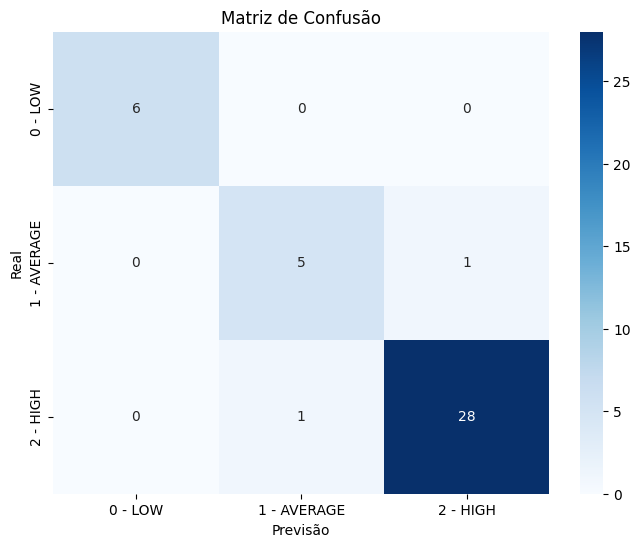

In [50]:
matriz_confusao = confusion_matrix(y_test, previsoes_reduzido)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, cmap='Blues', fmt='d',
            xticklabels=['0 - LOW', '1 - AVERAGE', '2 - HIGH'],
            yticklabels=['0 - LOW', '1 - AVERAGE', '2 - HIGH'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

- **Todas** as ocorrências da categoria **0-LOW** foram previstas corretamente pelo modelo
- Para a categoria **1-AVERAGE**, o modelo previu corretamente **5 ocorrências**, porém considerou **uma** como sendo da categoria **2-HIGH**
- Para a categoria **2-HIGH**, o modelo previu corretamente **28 ocorrências**, porém considerou **uma** como sendo da categoria **1-AVERAGE**

- Comparando as previsões da árvore completa com aquelas da árvore obtidas pelo modelo reduzido, que utiliza apenas as duas features mais importantes, observa-se que o primeiro apresentou resultados superiores. A correlação entre as variáveis influenciou positivamente na capacidade de generalização do modelo completo. Embora a diferença de desempenho seja pequena, a simplificação do segundo modelo limitou sua capacidade generalização dos dados.

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

- Naive Bayes / Acurácia: 0.98
- Naive Bayes / Precision: 0.95
- Naive Bayes / Recall: 0.94
- Naive Bayes / F1-Score: 0.94
- Naive Bayes / Média Ponderada: 0.98

- Árvore de Decisão / Acurácia Teste: 0.98
- Árvore de Decisão / Precision: 0.95
- Árvore de Decisão / Recall: 0.99
- Árvore de Decisão / F1-Score: 0.97
- Árvore de Decisão / Média Ponderada: 0.98

- Os dois modelos apresentaram resultados muito próximos e consistentes. No entanto, o modelo de ávore de decisão teve um desempenho ligeiramente superior no recall, identificando corretamente uma maior porção de amostras das classes, e no F1-Score, mostrando um melhor equilíbrio entre presicion e recall. As demais métricas permaneceram idênticas. Assim, para este projeto, a **árvore de decisão** se mostra a melhor opção de modelo.